In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price/laptop_price.csv


# laptops price pridiction by regression models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv', encoding = 'latin-1',index_col='laptop_ID')
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00


In [37]:
df.head(10)

,Inches,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,1339.69,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,13.3,898.94,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,15.6,575.00,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,15.4,2537.45,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,13.3,1803.60,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,15.6,400.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,15.4,2139.97,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,13.3,1158.70,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,14.0,1495.00,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# data preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


In [5]:
df.drop('Weight',axis=1,inplace=True)

In [6]:
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Price_euros         0
dtype: int64

In [7]:
df.duplicated().sum()

28

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1275, 11)

In [10]:
df.describe()

,Inches,Price_euros
count,1275.000000,1275.000000
mean,15.022902,1134.969059
std,1.429470,700.752504
min,10.100000,174.000000
25%,14.000000,609.000000
50%,15.600000,989.000000
75%,15.600000,1496.500000
max,18.400000,6099.000000


# data visualizing

<AxesSubplot:>

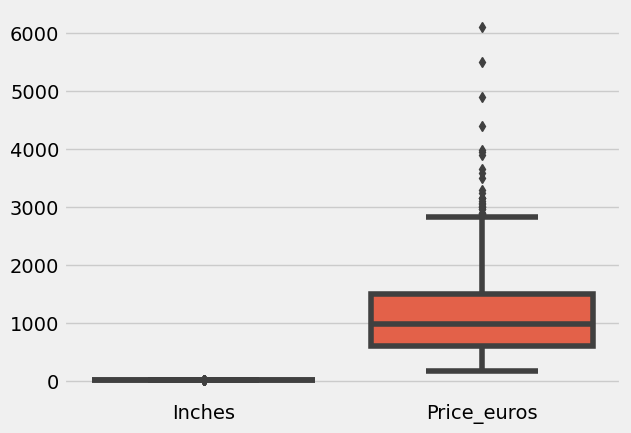

In [11]:
sns.boxplot(df)

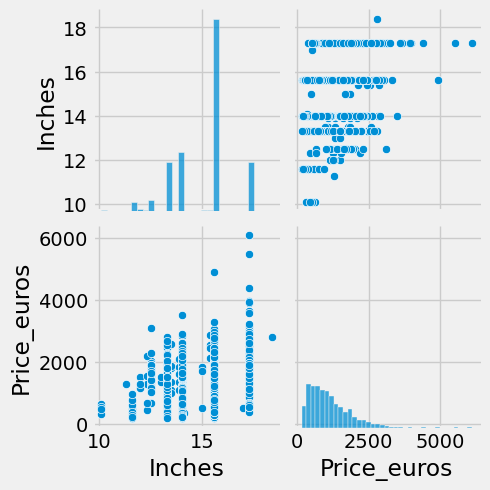

In [12]:
sns.pairplot(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

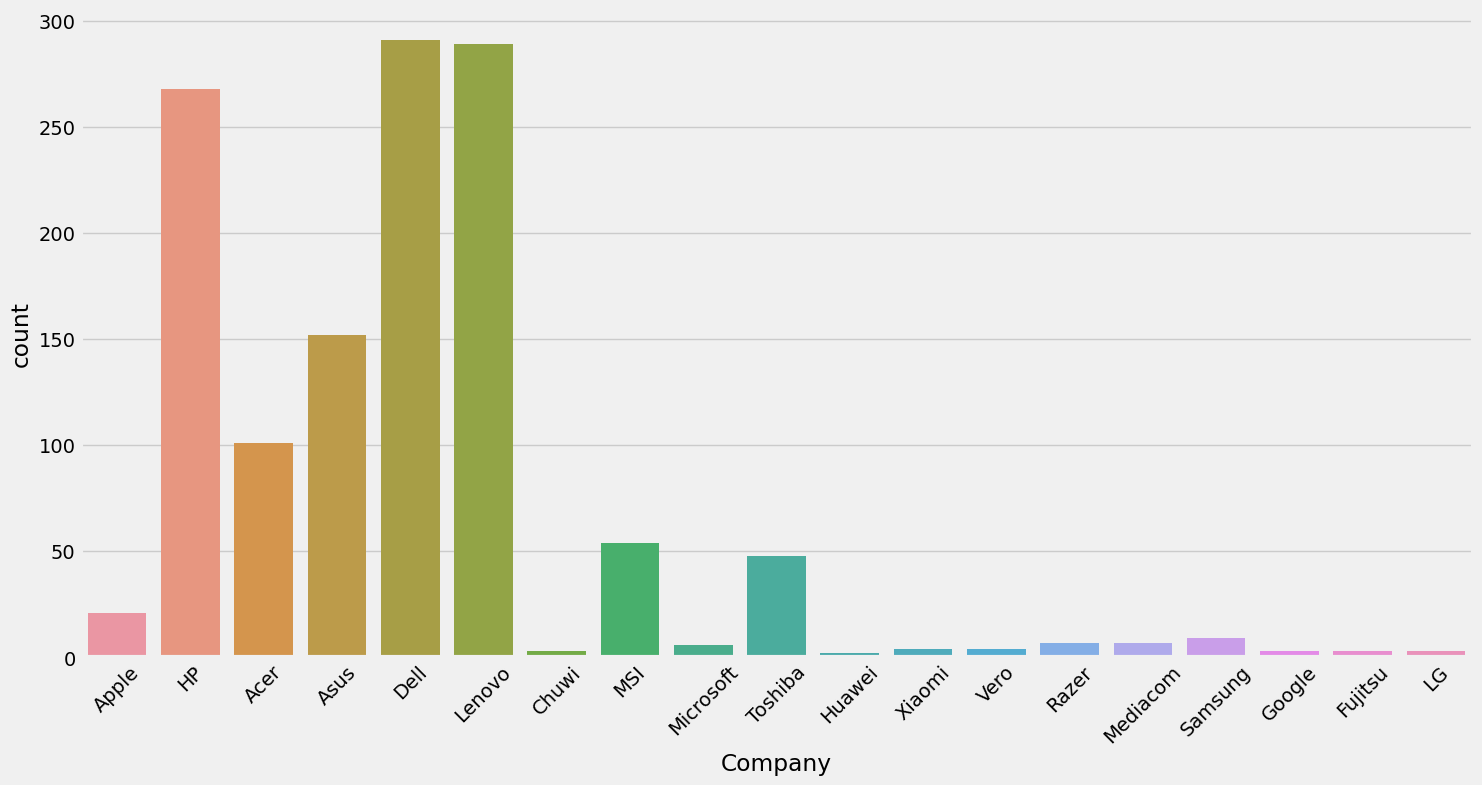

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(x='Company',data=df)
plt.xticks(rotation=45)

In [14]:
df.corr()

,Inches,Price_euros
Inches,1.000000,0.066608
Price_euros,0.066608,1.000000


# features correlations

<AxesSubplot:>

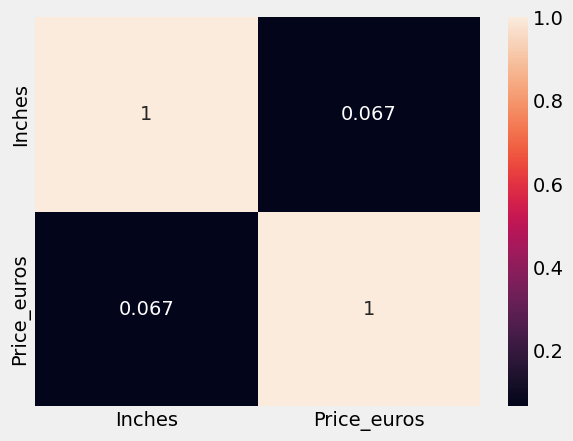

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df=pd.get_dummies(df)

In [17]:
df

,Inches,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,1339.69,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,13.3,898.94,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,15.6,575.00,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,15.4,2537.45,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,13.3,1803.60,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,14.0,638.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1289,13.3,1499.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1290,14.0,229.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
x=df.drop('Price_euros',axis=1)
y=df['Price_euros']

# split the data

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True,random_state=42)

In [39]:
y_test

laptop_ID
1197     650.0
348      716.0
657     1584.0
781     1020.0
812     1749.0
         ...  
709      399.0
1120    1413.1
431     2799.0
958     1299.0
67      1983.0
Name: Price_euros, Length: 255, dtype: float64

# scaling the data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
x_train_scaled=scaled.fit_transform(x_train)
x_test_scaled=scaled.transform(x_test)

# LASSO Model

In [21]:
from sklearn.linear_model import Lasso

# hyperparameters tunning

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[.0001,.01,.1,1],'selection':['cyclic','random']}
lasso=Lasso()
lasso_cv=GridSearchCV(lasso,param_grid,cv=5)
lasso_cv.fit(x_train_scaled,y_train)
print(lasso_cv.best_params_,lasso_cv.best_score_)

{'alpha': 0.1, 'selection': 'cyclic'} 0.7810638111271165


In [23]:
lasso=Lasso(alpha=.1)
lasso.fit(x_train_scaled,y_train)
lasso.score(x_test_scaled,y_test)

0.8829435689792391

In [80]:
from sklearn.metrics import mean_squared_error
y_pred=lasso.predict(x_test_scaled)

# comparing between true and predictions values to evaluate the model

In [76]:
y_pred[:21].round(0)

array([ 593.,  795., 1486., 1013., 1743.,  620., 1059.,  391., 2335.,
        746.,  795.,  834., 1143., 1633., 2495.,  592., 1392., 1087.,
       1640., 2601.,  630.])

In [77]:
y_test.values[:21].round(0)

array([ 650.,  716., 1584., 1020., 1749.,  557.,  999.,  330., 2268.,
        682.,  609.,  941., 1210., 1959., 2440.,  519., 1510., 1169.,
       1868., 2338.,  619.])

[]

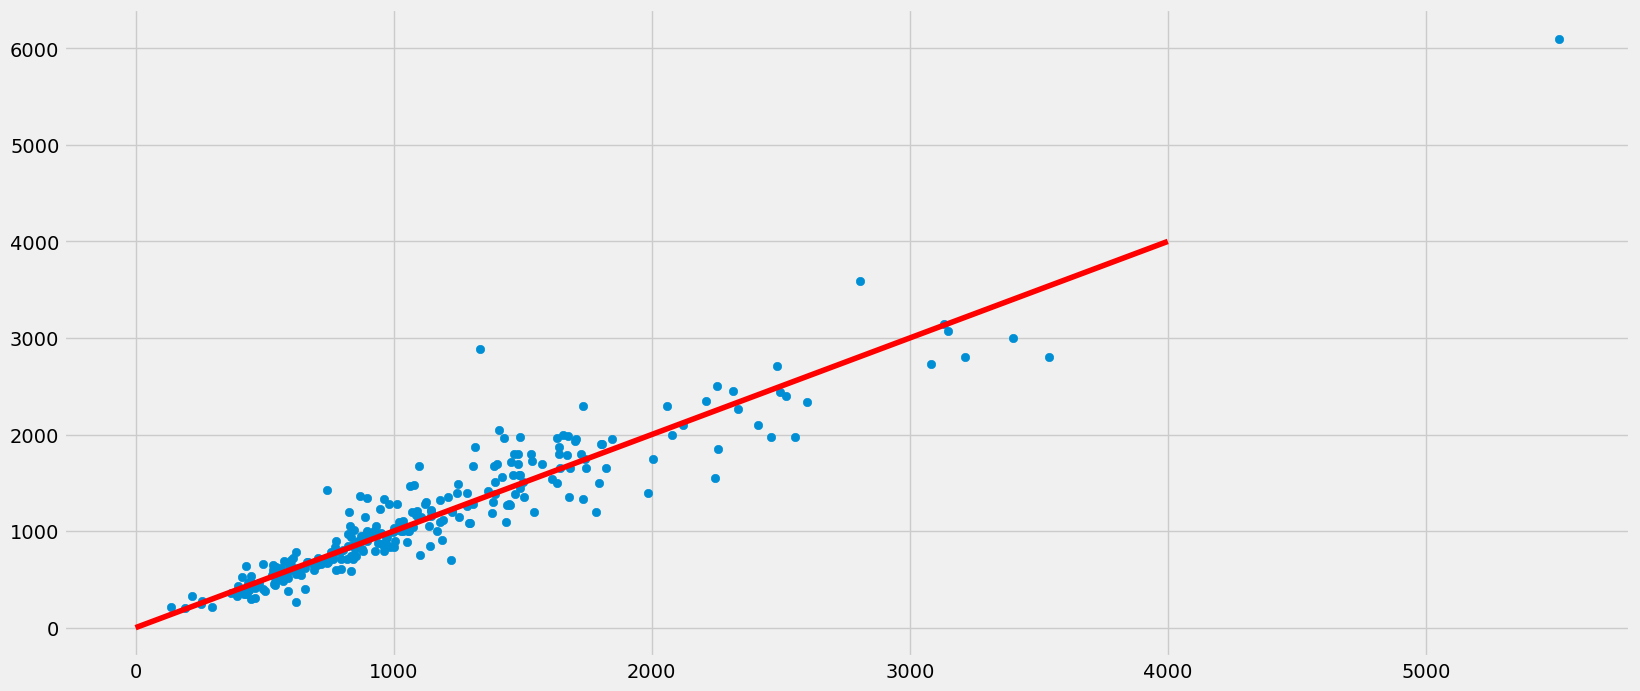

In [25]:
plt.figure(figsize=(18,8))
plt.scatter(y_pred,y_test)
plt.plot(np.arange(0,4000),np.arange(0,4000),c='red')
plt.plot()

# RandomForestRegressor Model

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8453863406952928

In [81]:
prediction=rf.predict(x_test_scaled)

# comparing between true and predictions values to evaluate the model

In [79]:
prediction[:21].round(0)

array([ 557.,  808.,  698.,  979., 1670.,  997.,  577.,  424., 1723.,
        730.,  747., 1014.,  995.,  821., 1528.,  787.,  824.,  516.,
        672., 1830.,  649.])

In [78]:
y_test.values[:21].round(0)

array([ 650.,  716., 1584., 1020., 1749.,  557.,  999.,  330., 2268.,
        682.,  609.,  941., 1210., 1959., 2440.,  519., 1510., 1169.,
       1868., 2338.,  619.])

[]

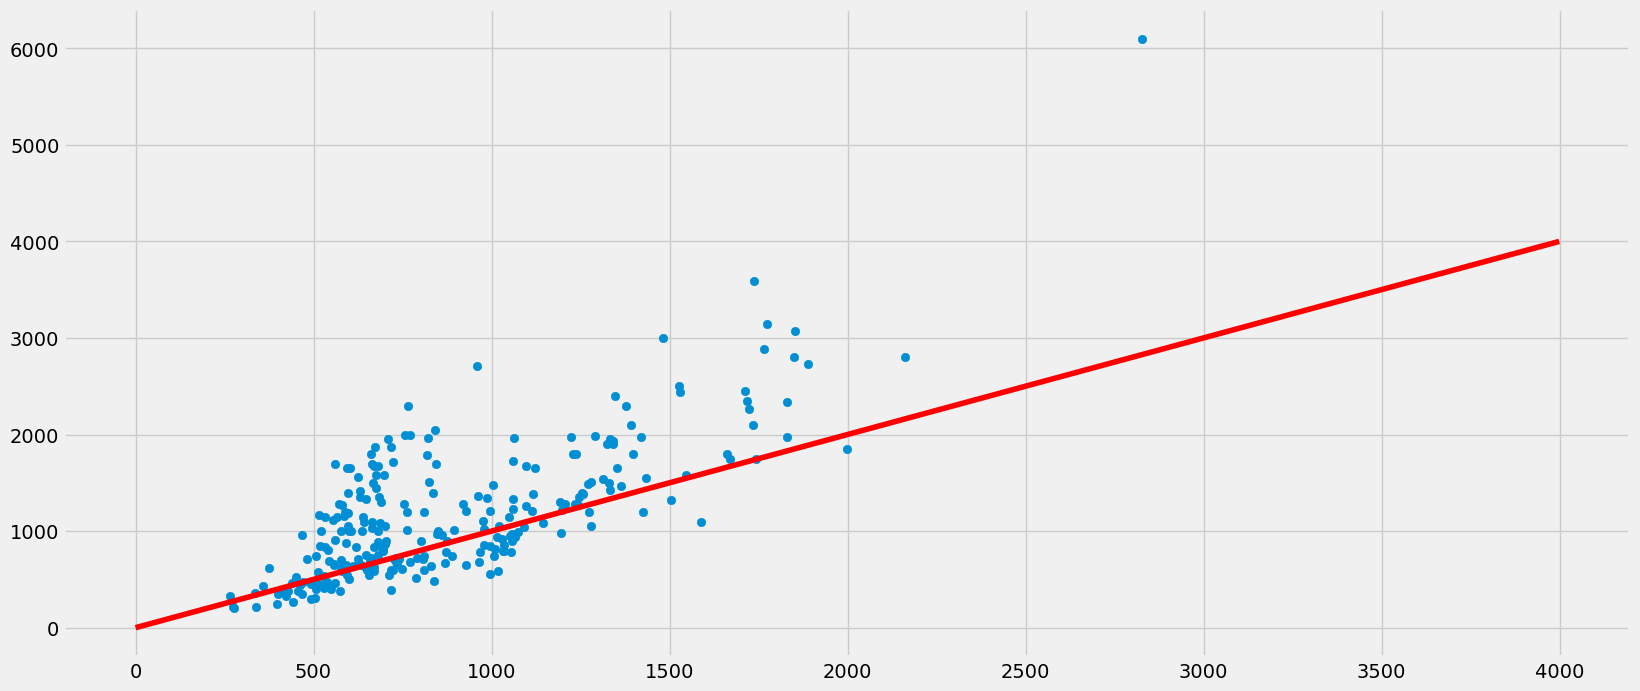

In [28]:
plt.figure(figsize=(18,8))
plt.scatter(prediction,y_test)
plt.plot(np.arange(0,4000),np.arange(0,4000),c='red')
plt.plot()

# the LASSO MODEL is better than LINEAR Regression and RandomForestRegressor in price prediction